Visualising spherical harmonics.

Example adapted from [https://scipython.com/book/chapter-8-scipy/examples/visualizing-the-spherical-harmonics/](https://scipython.com/book/chapter-8-scipy/examples/visualizing-the-spherical-harmonics/).

## Required dependencies

We load the usual dependencies `numpy` and `scipy`, and import the `sph_harm` function from `scipy`'s _special functions_ to calculate spherical harmonics of any degree and order.

In [1]:
import numpy as np
import scipy as sp
from scipy.special import sph_harm

## Spherical grid

We'll evaluate the function on a grid of $(\theta, \phi)$ values, and calculate the corresponding cartesian coordinates $(x,y,z)$ for plotting.

In [2]:
R = 10. # arbitrary radius
Np = 36 # number of steps along phi
Nt = 18 # number of steps along theta

theta = -np.arccos(np.linspace(-1, 1, Nt)) # uniform steps along cos(theta)
phi = np.linspace(0, 2*np.pi, Np)

theta, phi = np.meshgrid(theta, phi)

x = R * np.sin(theta) * np.cos(phi) 
y = R * np.sin(theta) * np.sin(phi) 
z = R * np.cos(theta) 

## Spherical harmonics

Note that `sph_harm` harmfully takes the opposite convention to ours with regards to the meaning of `theta` and `phi` in the help page.

In [3]:
l = 5
m = 3

Ylm = 1/R**(l+1) * sph_harm(m, l, phi, theta).real

## Plotting (static)

We first use `matplotlib` to create a 3D surface plot, rescaling the scalar values to a colour palette defined to map on the interval $[0,1]$.

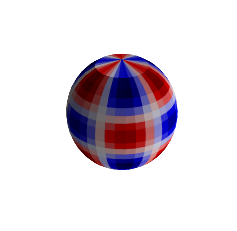

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D

fmax, fmin = Ylm.max(), Ylm.min()
Ylm = (Ylm - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(Ylm))
# Turn off the axis planes
ax.set_axis_off()
plt.show()

## Plotting (interactive)

With the Jupyter notebook, or in the ipython console, you can create an interactive version of this plot using the Plotly library.

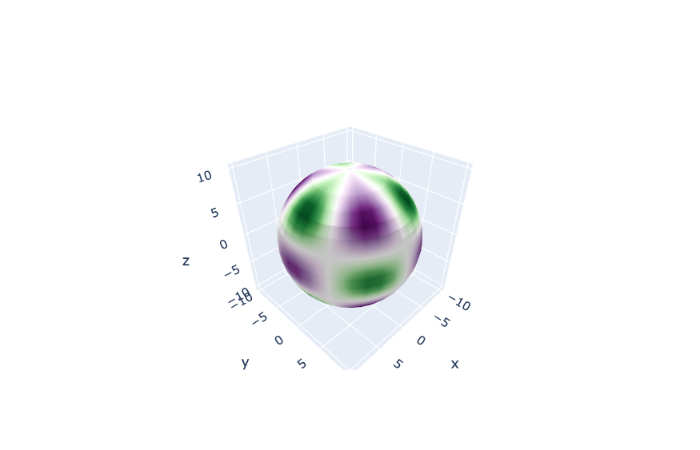

In [5]:
import plotly.graph_objects as go
#import chart_studio.plotly as py

fig = go.Figure()

fig.add_trace(go.Surface(x=x, y=y, z=z, 
                surfacecolor=Ylm, 
                showscale=False, 
                colorscale='PrGN'))

# fig.show() # note: interactive output doesn't work on this website, but run it in Jupyter or Spyder

fig.show(renderer='png')

_Download this page [as a Jupyter notebook](https://github.com/vuw-scps/python-physics/raw/master/notebooks/phys304/Ylm.ipynb) or as a [standalone Python script](https://github.com/vuw-scps/python-physics/raw/master/scripts/phys304/Ylm.py)._